In [32]:
from sklearn.datasets import load_linnerud
import pandas as pd
import numpy as np

In [33]:
load = load_linnerud()

In [34]:
load

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [47]:
X = pd.DataFrame(load.data, columns = load.feature_names)

In [48]:
y = pd.DataFrame(load.target[:, 0], columns=['Weight'])

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [52]:
scaler = StandardScaler()

In [83]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit(y_test)

In [84]:
X_train

,Chins,Situps,Jumps
5,4.0,101.0,42.0
8,15.0,200.0,40.0
12,14.0,215.0,105.0
10,17.0,120.0,38.0
15,12.0,210.0,120.0
18,15.0,225.0,73.0
7,6.0,125.0,40.0
2,12.0,101.0,101.0
13,1.0,50.0,50.0
11,13.0,210.0,115.0


In [85]:
X_train_scaled

array([[-1.14571161, -0.81976927, -0.78810729],
       [ 1.04608451,  0.88208463, -0.85590147],
       [ 0.84683032,  1.13994128,  1.34740924],
       [ 1.4445929 , -0.49315085, -0.92369564],
       [ 0.44832193,  1.05398906,  1.85586556],
       [ 1.04608451,  1.31184571,  0.26270243],
       [-0.74720322, -0.40719863, -0.85590147],
       [ 0.44832193, -0.81976927,  1.21182089],
       [-1.74347418, -1.69648188, -0.51693059],
       [ 0.64757613,  1.05398906,  1.68638012],
       [-1.54421999, -0.66505528, -0.17795971],
       [ 0.44832193, -0.7510075 , -0.95759273],
       [-1.14571161, -1.52457745, -1.36435779],
       [ 0.24906774,  1.39779793,  0.49998205],
       [-0.94645741,  0.22884778, -0.17795971],
       [ 0.64757613,  0.10851467, -0.24575389]])

In [86]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [87]:
model = Sequential()

In [88]:
model.add(Dense(3, activation='relu', input_dim = 3))
model.add(Dense(1, activation = 'linear'))

C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.compile(loss = 'mean_squared_error', optimizer= 'Adam', metrics=['accuracy'])

In [91]:
history = model.fit(X_train_scaled, y_train_scaled, epochs=10, validation_split=0.2)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.4322 - val_accuracy: 0.0000e+00 - val_loss: 1.0205
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.0000e+00 - loss: 2.4201 - val_accuracy: 0.0000e+00 - val_loss: 1.0161
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.0000e+00 - loss: 2.4081 - val_accuracy: 0.0000e+00 - val_loss: 1.0117
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.0000e+00 - loss: 2.3961 - val_accuracy: 0.0000e+00 - val_loss: 1.0074
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.0000e+00 - loss: 2.3842 - val_accuracy: 0.0000e+00 - val_loss: 1.0032
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.0000e+00 - loss: 2.3723 - val_accuracy: 0.0000e+00 - val_loss: 0.9990
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.0000e+00 - loss: 2.3605 - val_accuracy: 0.0000e+00 - val_loss: 0.9948
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.0

In [73]:
model.layers[0].get_weights()

[array([[ 0.834357  ,  0.7986459 , -0.16123055],
        [ 0.42252713, -0.04504831, -0.06201712],
        [-0.04846945, -0.5075575 ,  0.76942766]], dtype=float32),
 array([0.0099909 , 0.00999652, 0.01002116], dtype=float32)]

In [74]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([[-0.71249676],
       [-0.06143794],
       [-1.3465824 ],
       [-0.43417746]], dtype=float32)

In [76]:
y_test

,Weight
9,154.0
6,211.0
19,138.0
14,193.0


In [77]:
import matplotlib.pyplot as plt

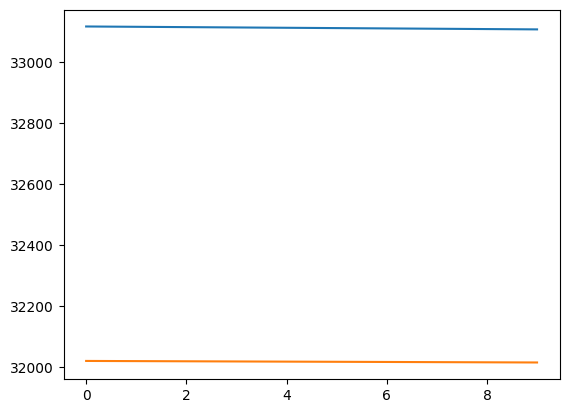

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])